<a href="https://colab.research.google.com/github/zziziz/2025-1-BDA/blob/main/inclass/09w_A_mon_0512_easy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##9주차 수업

##결측값 제거

In [1]:
import pandas as pd
import numpy as np
import seaborn  as sns
import matplotlib.pyplot as plt

In [3]:


df = pd.DataFrame({'sex'   : ['M', 'F', np.nan, 'M', 'F'],
                   'score' : [5, 4, 3, 4, None]})
df

,sex,score
0,M,5.0
1,F,4.0
2,NaN,3.0
3,M,4.0
4,F,NaN


In [4]:
df.dropna()

,sex,score
0,M,5.0
1,F,4.0
3,M,4.0


In [5]:
df.dropna(axis=0)

,sex,score
0,M,5.0
1,F,4.0
3,M,4.0


In [6]:
df

,sex,score
0,M,5.0
1,F,4.0
2,NaN,3.0
3,M,4.0
4,F,NaN


In [8]:
df_no = df.dropna(subset = ['score'])
df_no

,sex,score
0,M,5.0
1,F,4.0
2,NaN,3.0
3,M,4.0


In [9]:
df_no['score'] + 1

,score
0,6.0
1,5.0
2,4.0
3,5.0


In [11]:
df_no = df.dropna(subset = ['score', 'sex'])
df_no

,sex,score
0,M,5.0
1,F,4.0
3,M,4.0


In [12]:
df.score.mean()

np.float64(4.0)

In [13]:
df['score'].mean()

np.float64(4.0)

In [15]:


df.groupby('sex').agg(mean_score = ('score', 'mean'),
                      sum_score = ('score', 'sum'))

,mean_score,sum_score
sex,,
F,4.0,4.0
M,4.5,9.0


In [16]:

df = pd.DataFrame({"name": ['Alfred', 'Batman', 'Catwoman'],
                   "toy": [np.nan, 'Batmobile', 'Bullwhip'],
                   "born": [np.nan, pd.Timestamp("1940-04-25"),
                             pd.NaT]})
df



,name,toy,born
0,Alfred,NaN,NaT
1,Batman,Batmobile,1940-04-25
2,Catwoman,Bullwhip,NaT


In [17]:
df

,name,toy,born
0,Alfred,NaN,NaT
1,Batman,Batmobile,1940-04-25
2,Catwoman,Bullwhip,NaT


In [18]:
df.isna()

,name,toy,born
0,False,True,True
1,False,False,False
2,False,False,True


In [19]:
df.dropna()

,name,toy,born
1,Batman,Batmobile,1940-04-25


In [21]:
df.dropna(axis=1)

,name
0,Alfred
1,Batman
2,Catwoman


In [22]:
df.dropna(axis='columns')

,name
0,Alfred
1,Batman
2,Catwoman


In [23]:
df.dropna(how='any')

,name,toy,born
1,Batman,Batmobile,1940-04-25


In [24]:
df.dropna(how='all')

,name,toy,born
0,Alfred,NaN,NaT
1,Batman,Batmobile,1940-04-25
2,Catwoman,Bullwhip,NaT


In [26]:
df.dropna(thresh = 2)

,name,toy,born
1,Batman,Batmobile,1940-04-25
2,Catwoman,Bullwhip,NaT


In [27]:
df.dropna(thresh=1)

,name,toy,born
0,Alfred,NaN,NaT
1,Batman,Batmobile,1940-04-25
2,Catwoman,Bullwhip,NaT


In [28]:
df.dropna(thresh=3)

,name,toy,born
1,Batman,Batmobile,1940-04-25


In [30]:
df.dropna(subset=['name', 'toy'])

,name,toy,born
1,Batman,Batmobile,1940-04-25
2,Catwoman,Bullwhip,NaT


In [32]:
df.dropna(subset=['name', 'born'])

,name,toy,born
1,Batman,Batmobile,1940-04-25


In [33]:
df

,name,toy,born
0,Alfred,NaN,NaT
1,Batman,Batmobile,1940-04-25
2,Catwoman,Bullwhip,NaT


데이터프레임이 빈 것 확인 : 속성 empty

In [34]:
df1 = pd.DataFrame()
df1

""


In [35]:
df1.empty

True

In [36]:
df1 = pd.DataFrame(index=['row1', 'row2', 'row3'])
df1

""
row1
row2
row3


In [37]:
df1.empty

True

In [42]:

df2 = pd.DataFrame(columns= ['col1', 'col2', 'col3'])
df2

,col1,col2,col3


In [43]:
df2.empty

True

In [44]:

df3 = pd.DataFrame(index= ['row1', 'row2', 'row3'], columns= ['col1', 'col2', 'col3'])
df3

,col1,col2,col3
row1,NaN,NaN,NaN
row2,NaN,NaN,NaN
row3,NaN,NaN,NaN


In [46]:

df4 = pd.DataFrame(100,
                   index   = ['row1', 'row2', 'row3'],
                   columns = ['col1', 'col2', 'col3'])
df4

,col1,col2,col3
row1,100,100,100
row2,100,100,100
row3,100,100,100


결측값 대체

In [47]:
!git clone http://github.com/ai7dnn/data

Cloning into 'data'...
remote: Enumerating objects: 33, done.
remote: Counting objects: 100% (33/33), done.
remote: Compressing objects: 100% (31/31), done.
remote: Total 33 (delta 7), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (33/33), 2.17 MiB | 3.75 MiB/s, done.
Resolving deltas: 100% (7/7), done.


In [48]:
exam = pd.read_csv('data/exam.csv')
exam.head()


,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58
4,5,2,25,80,65


In [50]:
exam.loc[[2, 7, 14], ['math']]=np.nan
exam.loc[[2, 7, 14]]

,id,nclass,math,english,science
2,3,1,NaN,86,78
7,8,2,NaN,78,25
14,15,4,NaN,56,78


In [52]:
exam.isna().sum().sum()

np.int64(3)

## 결측값 채워넣기

In [54]:
exam['math'] = exam['math'].fillna(100)
exam.loc[[2, 7, 14]]

,id,nclass,math,english,science
2,3,1,100.0,86,78
7,8,2,100.0,78,25
14,15,4,100.0,56,78


In [56]:
exam['math'] = exam['math'].fillna(exam.math.mean())
exam.loc[[2, 7, 14]]

,id,nclass,math,english,science
2,3,1,100.0,86,78
7,8,2,100.0,78,25
14,15,4,100.0,56,78


In [57]:
pd.set_option('display.precision', 2)
exam.loc[[2, 7, 14]]

,id,nclass,math,english,science
2,3,1,100.0,86,78
7,8,2,100.0,78,25
14,15,4,100.0,56,78


In [58]:
df = pd.DataFrame({'sex'   : [1, 2, 1, 3, 2, 1],
                   'score' : [5, 4, 3, 4, 2, 6]})
df

,sex,score
0,1,5
1,2,4
2,1,3
3,3,4
4,2,2
5,1,6


In [59]:
df['sex'].value_counts()

,count
sex,
1,3
2,2
3,1


In [60]:
df['sex'].value_counts().sort_index()

,count
sex,
1,3
2,2
3,1


In [62]:
df['sex'].value_counts().sort_values()

,count
sex,
3,1
2,2
1,3


In [66]:
df['sex'].value_counts().sort_index(ascending=False)

,count
sex,
3,1
2,2
1,3


In [67]:
df['score'].value_counts().sort_values()

,count
score,
5,1
3,1
2,1
6,1
4,2


In [68]:
df

,sex,score
0,1,5
1,2,4
2,1,3
3,3,4
4,2,2
5,1,6


In [69]:
df['sex']=np.where(df['sex']==3, np.nan, df['sex'])
df

,sex,score
0,1.0,5
1,2.0,4
2,1.0,3
3,NaN,4
4,2.0,2
5,1.0,6


In [70]:
df['score'] = np.where(df['score']>5, np.nan, df['score'])
df

,sex,score
0,1.0,5.0
1,2.0,4.0
2,1.0,3.0
3,NaN,4.0
4,2.0,2.0
5,1.0,NaN


In [71]:
df

,sex,score
0,1.0,5.0
1,2.0,4.0
2,1.0,3.0
3,NaN,4.0
4,2.0,2.0
5,1.0,NaN


In [72]:
df.groupby('sex').agg(mean_score = ('score', 'mean'))

,mean_score
sex,
1.0,4.0
2.0,3.0


In [73]:
df.dropna()

,sex,score
0,1.0,5.0
1,2.0,4.0
2,1.0,3.0
4,2.0,2.0


In [74]:
df.dropna(subset = ['sex', 'score']).groupby('sex').agg(mean_score = ('score', 'mean'))

,mean_score
sex,
1.0,4.0
2.0,3.0


In [75]:
df = pd.DataFrame([1, 1, 2, 2])
df

,0
0,1
1,1
2,2
3,2


In [76]:
df = pd.DataFrame({'x1': [1, 1, 2, 2]})
df['x2'] = np.where(df['x1'] == 1, 10, np.nan)
df


,x1,x2
0,1,10.0
1,1,10.0
2,2,NaN
3,2,NaN


In [77]:
df.isna()

,x1,x2
0,False,False
1,False,False
2,False,True
3,False,True


In [84]:

df = pd.DataFrame({'x1': [1, 1, 2, 2]})
df['x2'] = np.where(df['x1'] == 1, 'a', None)
df

,x1,x2
0,1,a
1,1,a
2,2,None
3,2,None


In [85]:
df = pd.DataFrame({'x1': [1, 1, 2, 2]})
df['x2'] = np.where(df['x1'] == 1, 'a', 'etc')
df

,x1,x2
0,1,a
1,1,a
2,2,etc
3,2,etc


In [86]:
df['x2'] = df['x2'].replace('etc', np.nan)
df

,x1,x2
0,1,a
1,1,a
2,2,NaN
3,2,NaN


In [87]:
df.isna()

,x1,x2
0,False,False
1,False,False
2,False,True
3,False,True


In [88]:
df = df.fillna(10)
df

,x1,x2
0,1,a
1,1,a
2,2,10
3,2,10


In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   x1      4 non-null      int64 
 1   x2      4 non-null      object
dtypes: int64(1), object(1)
memory usage: 196.0+ bytes


In [90]:
type(df.loc[2, 'x2'])

int

## 이상값 알아보기

In [91]:
mpg = pd.read_csv('data/mpg.csv')
mpg.sample(5)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
31,chevrolet,k1500 tahoe 4wd,6.5,1999,8,auto(l4),4,14,17,d,suv
118,hyundai,tiburon,2.0,2008,4,auto(l4),f,20,27,r,subcompact
221,volkswagen,new beetle,1.9,1999,4,manual(m5),f,35,44,d,subcompact
213,volkswagen,jetta,2.0,1999,4,manual(m5),f,21,29,r,compact
116,hyundai,tiburon,2.0,1999,4,manual(m5),f,19,29,r,subcompact


In [92]:
mpg.describe()

,displ,year,cyl,cty,hwy
count,234.00,234.00,234.00,234.00,234.00
mean,3.47,2003.50,5.89,16.86,23.44
std,1.29,4.51,1.61,4.26,5.95
min,1.60,1999.00,4.00,9.00,12.00
25%,2.40,1999.00,4.00,14.00,18.00
50%,3.30,2003.50,6.00,17.00,24.00
75%,4.60,2008.00,8.00,19.00,27.00
max,7.00,2008.00,8.00,35.00,44.00


In [93]:
%config InlineBackend.figure_format = 'retina'

In [94]:
mpg.hwy.describe()

,hwy
count,234.00
mean,23.44
std,5.95
min,12.00
25%,18.00
50%,24.00
75%,27.00
max,44.00


In [95]:
mpg.describe(include='all')

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
count,234,234,234.00,234.00,234.00,234,234,234.00,234.00,234,234
unique,15,38,NaN,NaN,NaN,10,3,NaN,NaN,5,7
top,dodge,caravan 2wd,NaN,NaN,NaN,auto(l4),f,NaN,NaN,r,suv
freq,37,11,NaN,NaN,NaN,83,106,NaN,NaN,168,62
mean,NaN,NaN,3.47,2003.50,5.89,NaN,NaN,16.86,23.44,NaN,NaN
std,NaN,NaN,1.29,4.51,1.61,NaN,NaN,4.26,5.95,NaN,NaN
min,NaN,NaN,1.60,1999.00,4.00,NaN,NaN,9.00,12.00,NaN,NaN
25%,NaN,NaN,2.40,1999.00,4.00,NaN,NaN,14.00,18.00,NaN,NaN
50%,NaN,NaN,3.30,2003.50,6.00,NaN,NaN,17.00,24.00,NaN,NaN
75%,NaN,NaN,4.60,2008.00,8.00,NaN,NaN,19.00,27.00,NaN,NaN


In [96]:
mpg.hwy.describe()

,hwy
count,234.00
mean,23.44
std,5.95
min,12.00
25%,18.00
50%,24.00
75%,27.00
max,44.00


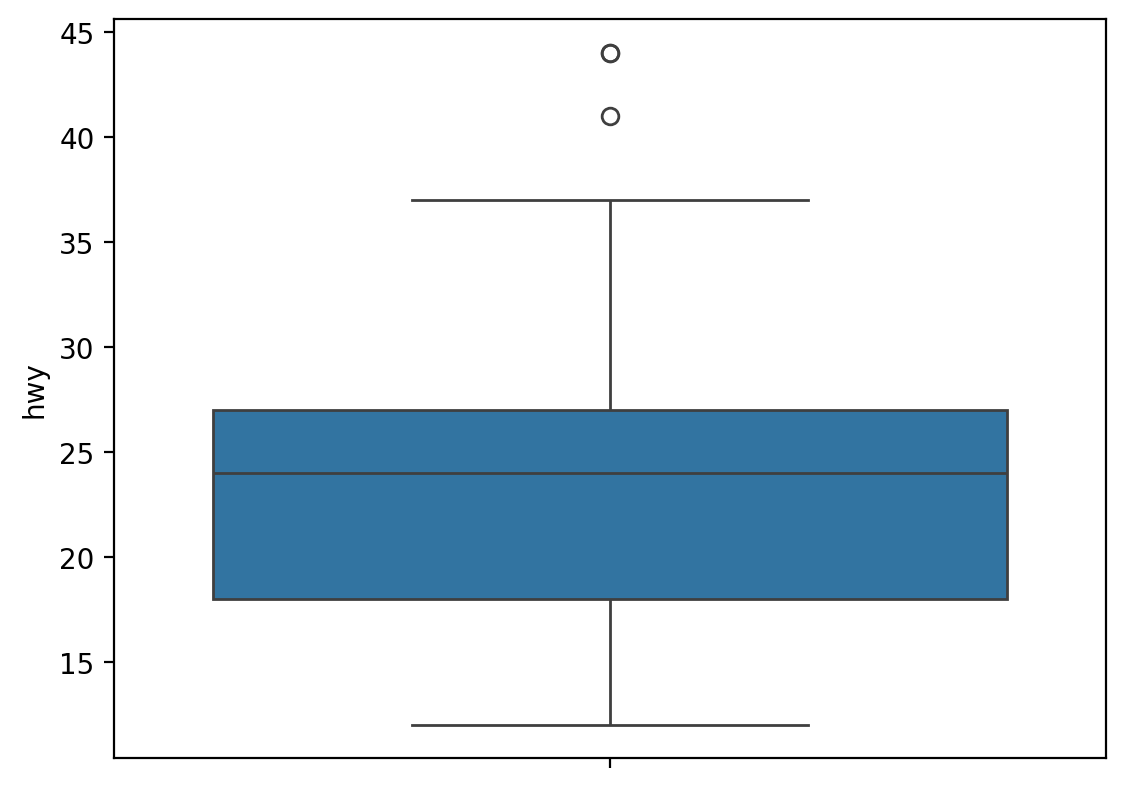

In [97]:
sns.boxplot(data=mpg, y ='hwy'); #시험문제

In [98]:
s = pd.Series([1, 2, 3, 4, 5])
s

,0
0,1
1,2
2,3
3,4
4,5


In [99]:
s.quantile([.1, .2, .25, .5, .75])

,0
0.10,1.4
0.20,1.8
0.25,2.0
0.50,3.0
0.75,4.0


In [101]:
mpg.hwy.describe()

,hwy
count,234.00
mean,23.44
std,5.95
min,12.00
25%,18.00
50%,24.00
75%,27.00
max,44.00


In [102]:
mpg.hwy.quantile([1, .75, .5, .25, 0])

,hwy
1.00,44.0
0.75,27.0
0.50,24.0
0.25,18.0
0.00,12.0


In [105]:
a,b,c = [10, 20, 30] #개수 맞추기
a

10

In [108]:
p25, p50, p75 = mpg.hwy.quantile([.25, .5, .75])
p25, p50, p75

(18.0, 24.0, 27.0)

In [109]:
iqr = p75 - p25
iqr

9.0

In [110]:
## upper fence
UF = p75 + 1.5 * iqr
UF

40.5

In [111]:
## lower fence
LF = p25 - 1.5 * iqr
LF

4.5

In [113]:
mpg.hwy.describe()

,hwy
count,234.00
mean,23.44
std,5.95
min,12.00
25%,18.00
50%,24.00
75%,27.00
max,44.00


In [114]:
mpg.hwy.describe()['50%']

np.float64(24.0)

In [115]:
mpg[ mpg.hwy > UF]['hwy']

,hwy
212,44
221,44
222,41


In [116]:
mpg[ mpg.hwy > UF]

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
212,volkswagen,jetta,1.9,1999,4,manual(m5),f,33,44,d,compact
221,volkswagen,new beetle,1.9,1999,4,manual(m5),f,35,44,d,subcompact
222,volkswagen,new beetle,1.9,1999,4,auto(l4),f,29,41,d,subcompact


In [117]:
mpg[ mpg.hwy < LF ]

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category


In [118]:
mpg[ (mpg['hwy'] < 4.5) | (mpg['hwy'] > 40.5) ]

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
212,volkswagen,jetta,1.9,1999,4,manual(m5),f,33,44,d,compact
221,volkswagen,new beetle,1.9,1999,4,manual(m5),f,35,44,d,subcompact
222,volkswagen,new beetle,1.9,1999,4,auto(l4),f,29,41,d,subcompact


In [119]:
mpg['hwy'] = np.where((mpg.hwy < LF) | (mpg.hwy > UF), np.nan, mpg['hwy'])
mpg.hwy.isna().sum()

np.int64(3)

In [121]:
dmpg = mpg.dropna(subset=['hwy'])
len(dmpg)

231

In [122]:
dmpg.groupby('drv').agg(mean_hwy = ('hwy', 'mean'))

,mean_hwy
drv,
4,19.17
f,27.73
r,21.00


In [123]:
dmpg.groupby('drv').agg(mean_hwy = ('hwy', 'mean'))

,mean_hwy
drv,
4,19.17
f,27.73
r,21.00


In [124]:
mpg.groupby('drv').agg(mean_hwy = ('hwy', 'mean'))

,mean_hwy
drv,
4,19.17
f,27.73
r,21.00


In [125]:
mpg = pd.read_csv('data/mpg.csv')
mpg.groupby('drv').agg(mean_hwy = ('hwy', 'mean'))

,mean_hwy
drv,
4,19.17
f,28.16
r,21.00


In [126]:
mpg[ (mpg['hwy'] < LF) | (mpg['hwy'] > UF) ]

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
212,volkswagen,jetta,1.9,1999,4,manual(m5),f,33,44,d,compact
221,volkswagen,new beetle,1.9,1999,4,manual(m5),f,35,44,d,subcompact
222,volkswagen,new beetle,1.9,1999,4,auto(l4),f,29,41,d,subcompact


##7장종료

##8장 그래프

In [127]:
!pip install koreanize-matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 57.2 MB/s eta 0:00:00


In [134]:
%config InlineBackend.figure_format = 'retina'

In [135]:
import matplotlib.pyplot as plt
import koreanize_matplotlib
import pandas as pd
import numpy as np
import seaborn as sns

In [136]:
plt.rcParams.update({'figure.dpi': 100})
plt.rcParams.update({'figure.figsize': [4, 2.5]})

In [138]:
mpg = pd.read_csv('data/mpg.csv')


<Axes: xlabel='displ', ylabel='hwy'>

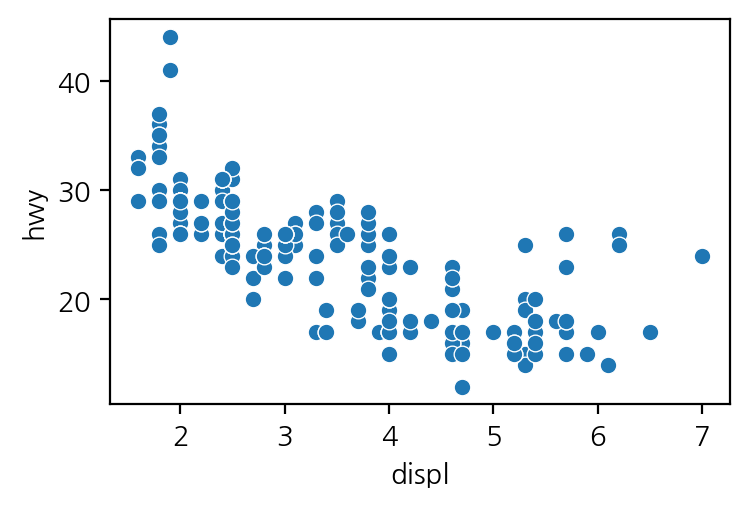

In [140]:
sns.scatterplot(data=mpg, x = 'displ', y='hwy')

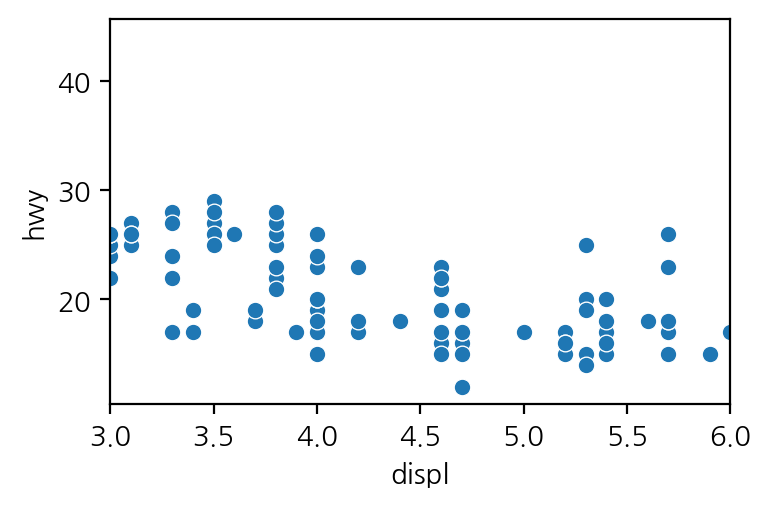

In [144]:
sns.scatterplot(data=mpg, x = 'displ', y='hwy').set(xlim=[3, 6]);

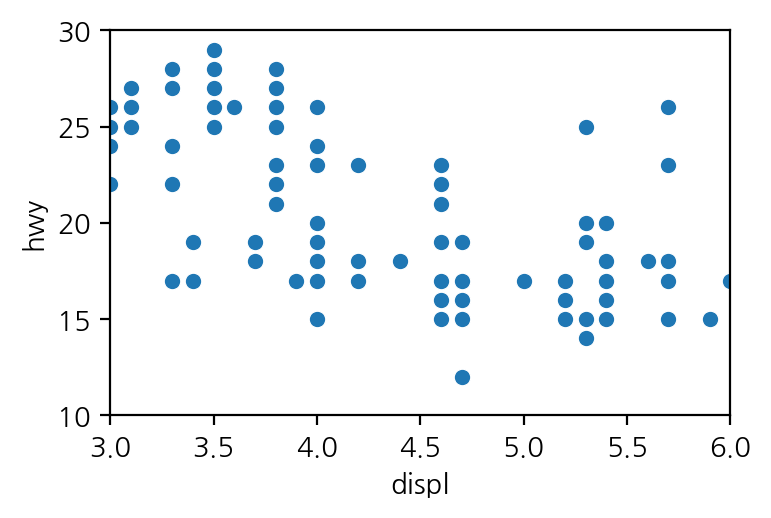

In [145]:
sns.scatterplot(data=mpg, x = 'displ', y='hwy').set(xlim=[3, 6], ylim=[10, 30]);

<Axes: xlabel='displ', ylabel='hwy'>

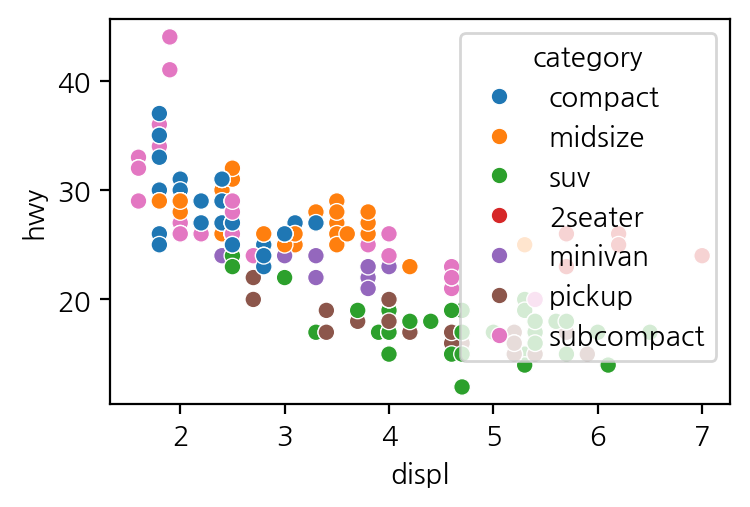

In [147]:
sns.scatterplot(data=mpg, x = 'displ', y='hwy', hue='category')

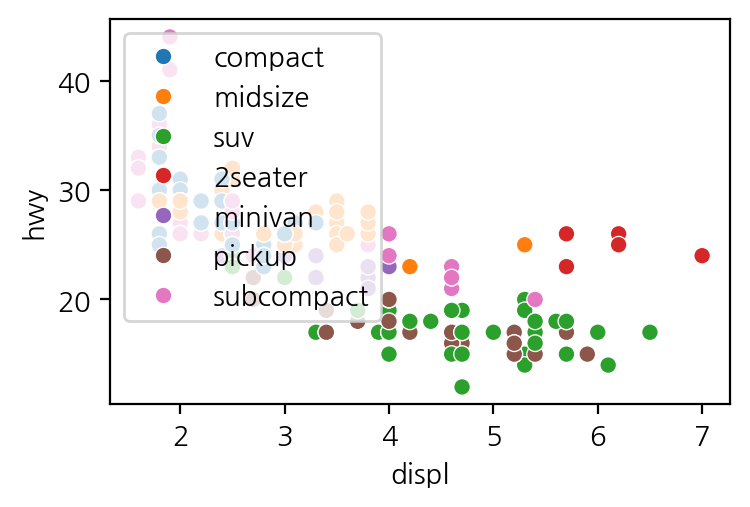

In [150]:
sns.scatterplot(data=mpg, x = 'displ', y='hwy', hue='category')
plt.legend(loc=2);

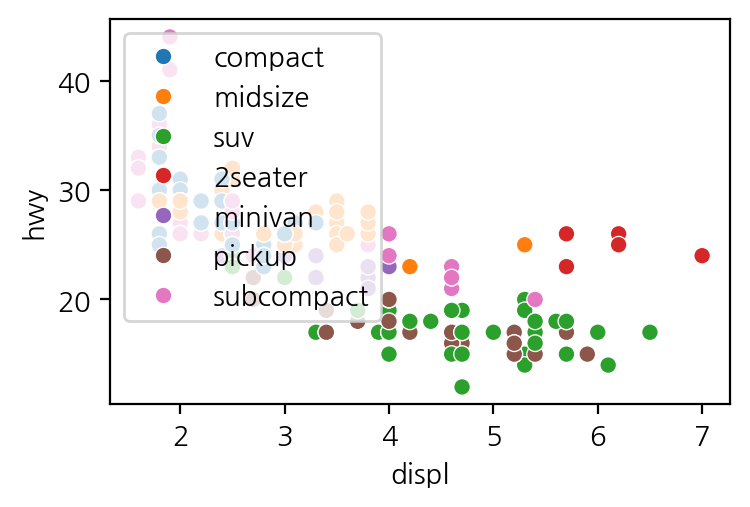

In [151]:
sns.scatterplot(data=mpg, x = 'displ', y='hwy', hue='category')
plt.legend(loc='upper left');

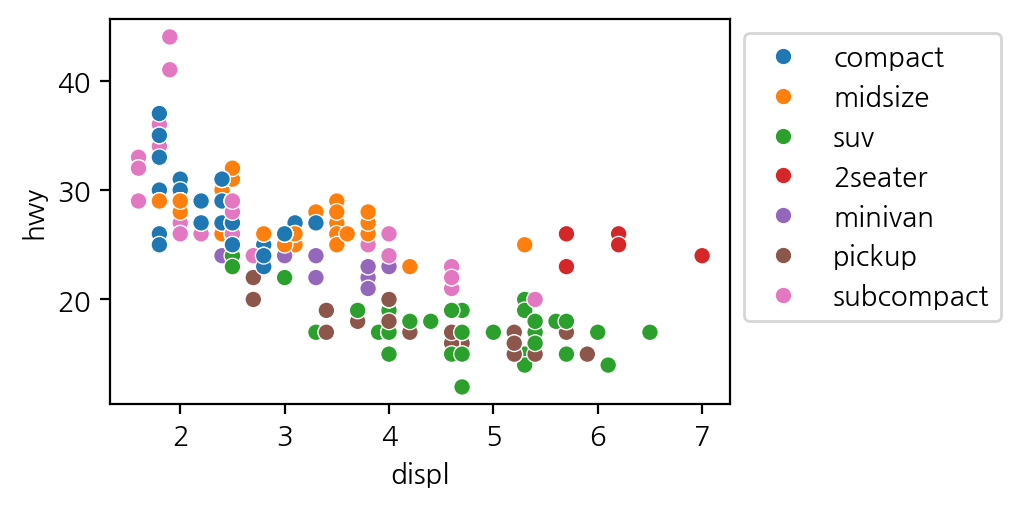

In [152]:
sns.scatterplot(data=mpg, x = 'displ', y='hwy', hue='category')
plt.legend(loc=2, bbox_to_anchor=(1, 1));

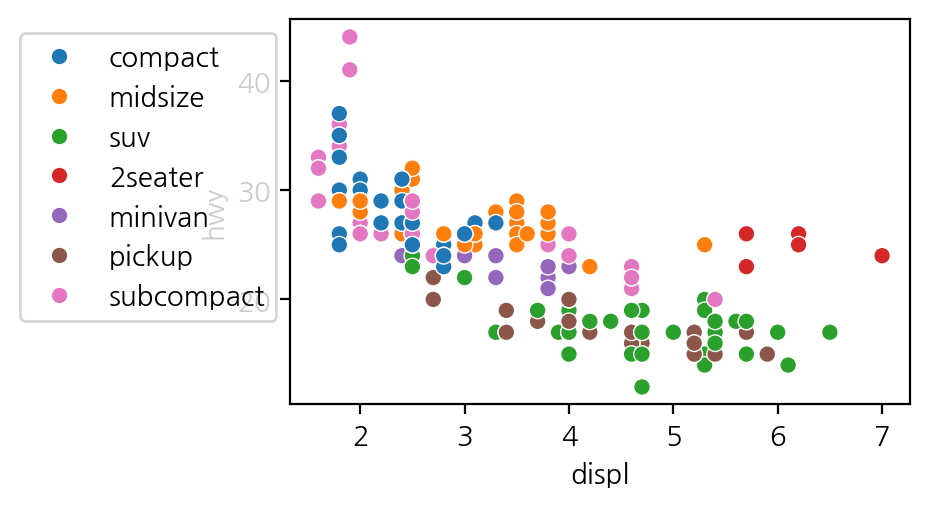

In [153]:
sns.scatterplot(data=mpg, x = 'displ', y='hwy', hue='category')
plt.legend(loc=1, bbox_to_anchor=(0, 1));

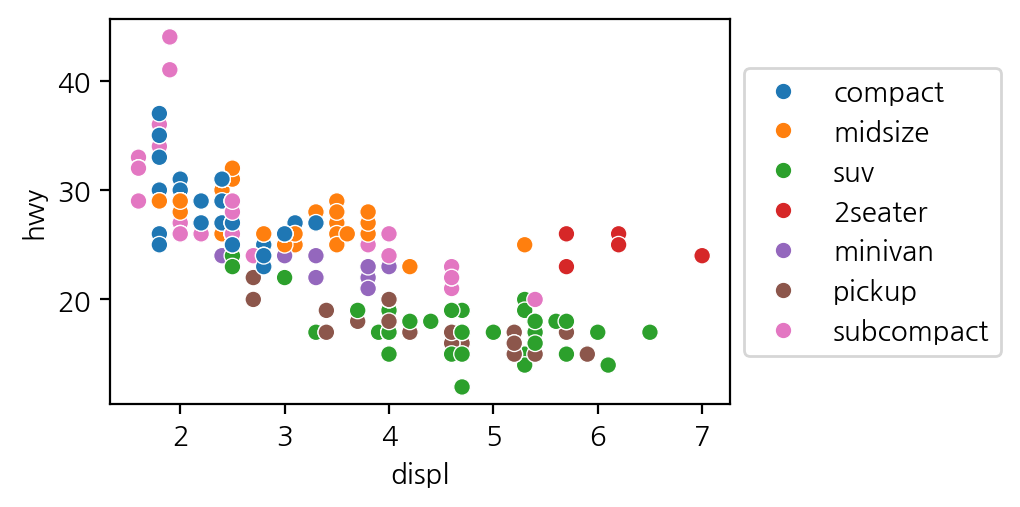

In [159]:
sns.scatterplot(data=mpg, x = 'displ', y='hwy', hue='category')
plt.legend(loc=6, bbox_to_anchor=(1, .5));

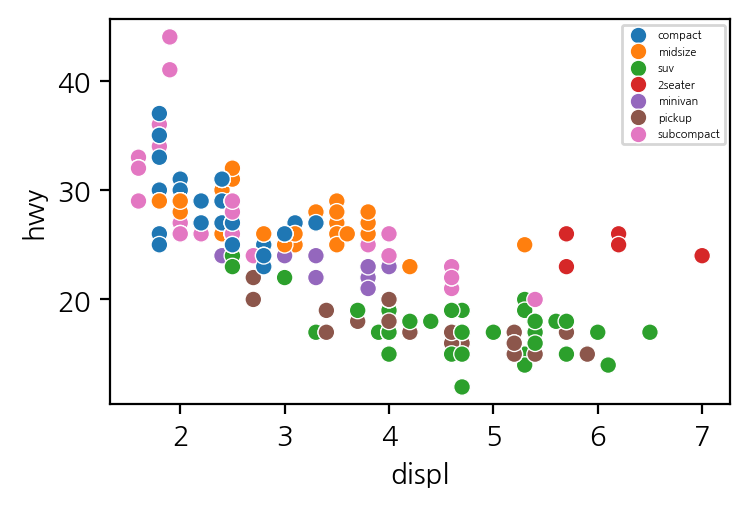

In [158]:
sns.scatterplot(mpg, x = 'displ', y='hwy', hue='category')
plt.legend(loc=1, fontsize=4)

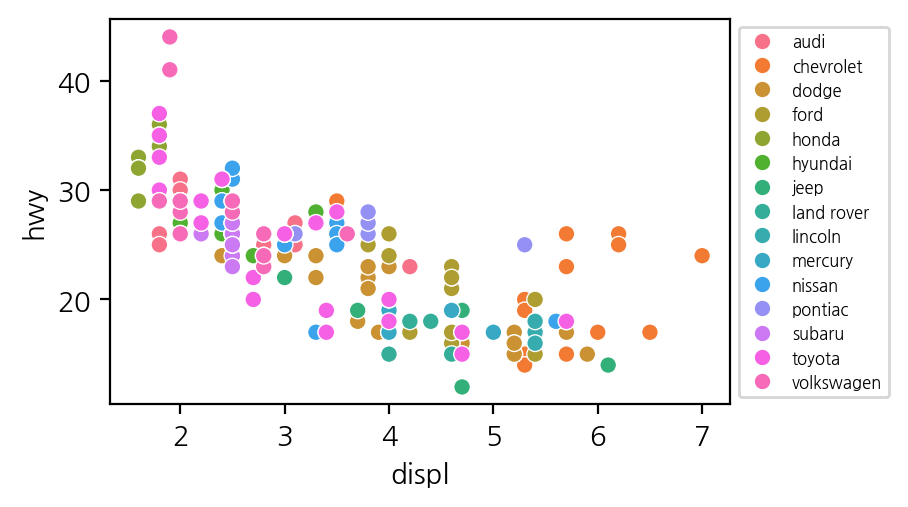

In [161]:
sns.scatterplot(mpg, x = 'displ', y='hwy', hue='manufacturer')
plt.legend(loc=6,bbox_to_anchor=(1, .5), fontsize=6)

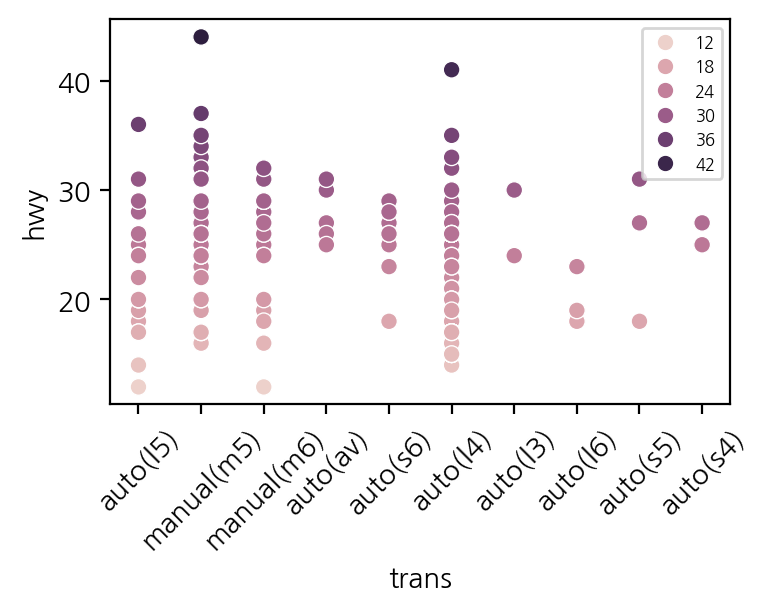

In [167]:
my=sns.scatterplot(mpg, x = 'trans', y='hwy', hue='hwy');
my.tick_params(axis='x', labelrotation=45);
my.legend(loc=1, bbox_to_anchor=(1, 1),fontsize=6);